In [5]:
import pandas as pd
from datetime import datetime
def timeconvert(ts):
    ts = int(ts)/1000
    return (datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))


In [71]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
events = pd.read_csv("events.csv")

In [6]:
events['time'] = events['event_timestamp'].apply(timeconvert)
events['time'] = pd.to_datetime(events['time']) 
events['day_current'] = events['time'].dt.dayofyear 
purchase=events.loc[events.event=='8']
purchase['dayofweek']=purchase['time'].dt.dayofweek

/Users/hongdouli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [65]:
events.user_id_hash.describe()

count                                             111946597
unique                                               621001
top       5b307cc3931affbb59d75ef439b97b74189e162b654a48...
freq                                                  24836
Name: user_id_hash, dtype: object

### Visualization

In [7]:
day_of_week = purchase.groupby('dayofweek')['event'].count()

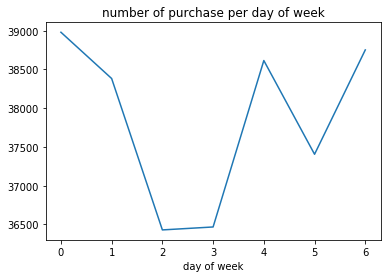

In [10]:
import matplotlib.pyplot as plt
plt.plot(day_of_week)
plt.xlabel("day of week")
plt.title("number of purchase per day of week")
plt.show()

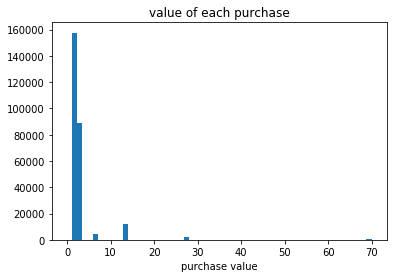

In [11]:
hist = plt.hist(purchase.event_value,bins=60)
plt.title("value of each purchase")
plt.xlabel("purchase value")
plt.show()

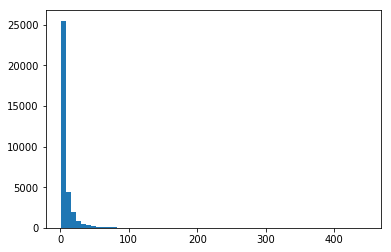

In [18]:
purchase_time = purchase.groupby('user_id_hash')['event'].count().to_frame()
hist = plt.hist(purchase_time.event,bins=60)
plt.xlabel("purchase times per person")
plt.show()

In [73]:
purchase.loc['hour']=purchase['time'].dt.hour
purchase_hour = purchase.groupby('hour')['event'].count()
purchase_hour.to_frame().sort_values('event')

,event
hour,
9.0,5727
10.0,5836
8.0,6067
11.0,6329
7.0,7375
12.0,7622
6.0,8687
13.0,9054
14.0,10157


### Feature Engineering

In [12]:
#split the data
purchase_train = purchase.loc[purchase.day_current <= 334]

In [13]:
# number of purchase of the last 2 months.
num_purchase_train = purchase_train.groupby('user_id_hash')['event'].count().to_frame()
num_purchase = purchase.groupby('user_id_hash')['event'].count().to_frame()

In [14]:
# total purchase value of the last 2 months.
value_purchase_train = purchase_train.groupby('user_id_hash')['event_value'].sum().to_frame()
value_purchase = purchase.groupby('user_id_hash')['event_value'].sum().to_frame()

In [45]:
# merge back to label
label = pd.read_csv("label.csv", sep='\t',index_col=0)

In [52]:
# features for training data with label
features_train = pd.merge(label, num_purchase_train, on = ['user_id_hash'], how = 'left')
features_train = pd.merge(features_train, value_purchase_train, on =['user_id_hash'], how='left')
features_train.columns = ['user_id_hash','user_purchase_binary_7_days','user_purchase_binary_14_days',
                         'num_purchase','value_purchase']
features_train = features_train.fillna(0)

In [53]:
features_train.to_csv('features_train.csv')

In [57]:
# features for test data
features = pd.merge(label, num_purchase, on = ['user_id_hash'], how = 'left')
features = pd.merge(features, value_purchase, on =['user_id_hash'], how='left')
features.columns = ['user_id_hash','user_purchase_binary_7_days','user_purchase_binary_14_days',
                         'num_purchase','value_purchase']
features = features[['user_id_hash','num_purchase','value_purchase']]
features = features.fillna(0)

In [59]:
features.to_csv('features.csv')